In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import numpy as np
from functools import reduce

<h3> A. Regression: City Human Capital Index Data </h3> 

In [2]:
os.chdir("C:/Users/user/Documents/UniCalifornia/ML with Python/Week 1/Script_Data1")
df = pd.read_csv('W01d_caschool.csv')

In [3]:
df.head()

,cdc,api,chci,alternative,charter,lausd,lacounty,english,black,asian,latino,white,elep,highp,poverty
0,01100170109835SE,776.0,168.2,0,1,0,0,19.0,10,20.0,12.0,53.0,46,22,46.0
1,01100170112607SH,637.0,123.5,0,1,0,0,12.0,45,2.0,41.0,5.0,0,100,72.0
2,01100170118489SE,791.0,129.4,0,1,0,0,22.0,32,1.0,66.0,0.0,40,60,75.0
3,01100170123968SE,693.0,161.4,0,0,0,0,21.0,29,6.0,26.0,21.0,100,0,42.0
4,01100170124172SE,944.0,212.2,0,0,0,0,4.0,4,38.0,2.0,12.0,100,0,13.0


In [4]:
df.tail()

,cdc,api,chci,alternative,charter,lausd,lacounty,english,black,asian,latino,white,elep,highp,poverty
9927,58727516056832SE,846.5,158.5,0,0,0,0,5.0,6,5.0,16.0,64.0,100,0,23.0
9928,58727516056840SE,822.5,141.1,0,0,0,0,10.0,2,6.0,21.0,60.0,100,0,48.0
9929,58727516118806SE,849.0,167.2,0,1,0,0,4.0,7,0.0,18.0,67.0,100,0,29.0
9930,58727690123570SH,NaN,131.3,0,0,0,0,17.0,17,0.0,33.0,50.0,0,100,67.0
9931,58727695838305SH,775.5,148.4,0,0,0,0,2.0,3,3.0,27.0,54.0,0,100,37.0


In [5]:
df.shape

(9932, 15)

In [6]:
corr =df.corr()
print(corr)

                  api      chci  alternative   charter     lausd  lacounty  \
api          1.000000  0.678070    -0.552232 -0.001220 -0.082977 -0.012982   
chci         0.678070  1.000000    -0.203713  0.058775 -0.187835 -0.125616   
alternative -0.552232 -0.203713     1.000000 -0.061835 -0.028160 -0.045241   
charter     -0.001220  0.058775    -0.061835  1.000000  0.150645  0.059753   
lausd       -0.082977 -0.187835    -0.028160  0.150645  1.000000  0.623502   
lacounty    -0.012982 -0.125616    -0.045241  0.059753  0.623502  1.000000   
english     -0.293240 -0.592933    -0.026170 -0.107000  0.055516  0.035604   
black       -0.212381 -0.112314     0.051301  0.102748  0.117824  0.125157   
asian        0.380563  0.425303    -0.134646 -0.073012 -0.092921 -0.013968   
latino      -0.434885 -0.753070     0.027798 -0.047145  0.248770  0.263174   
white        0.367490  0.627341     0.003631  0.048511 -0.245506 -0.299605   
elep         0.381369  0.141878    -0.333706 -0.085307  0.028541

<h5> Figure 13	 The Correlation between Public-School Parents’ CHCI
and Students’ API among 9199 Public Schools in
California </h5>

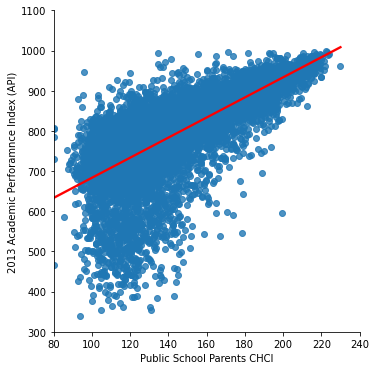

In [7]:
Sch = sns.lmplot(x="chci", y="api", data=df, line_kws={'color': 'red'})
Sch.set_axis_labels("Public School Parents CHCI", "2013 Academic Perforamnce Index (API)")
Sch.set(xlim=(80,240),ylim=(300,1100))
plt.show()

<h5> • Replicate the regression result for equation on page 69. </h5>

In [8]:
df_dummies = pd.get_dummies(df, columns=['alternative'], drop_first=True)
df_dummies = pd.get_dummies(df_dummies, columns=['lacounty'], drop_first=True)
df_dummies.head()

,cdc,api,chci,charter,lausd,english,black,asian,latino,white,elep,highp,poverty,alternative_1,lacounty_1
0,01100170109835SE,776.0,168.2,1,0,19.0,10,20.0,12.0,53.0,46,22,46.0,0,0
1,01100170112607SH,637.0,123.5,1,0,12.0,45,2.0,41.0,5.0,0,100,72.0,0,0
2,01100170118489SE,791.0,129.4,1,0,22.0,32,1.0,66.0,0.0,40,60,75.0,0,0
3,01100170123968SE,693.0,161.4,0,0,21.0,29,6.0,26.0,21.0,100,0,42.0,0,0
4,01100170124172SE,944.0,212.2,0,0,4.0,4,38.0,2.0,12.0,100,0,13.0,0,0


In [9]:
df_dummies.replace([np.inf, -np.inf], np.nan)

df_dummies.dropna(inplace=True)

In [10]:
df_dummies.shape

(9199, 15)

In [11]:
x = df_dummies[['chci','poverty','highp','alternative_1','lacounty_1','elep']]
y = df_dummies['api']
X = sm.add_constant(x)
eq00 = sm.OLS(y,X).fit()
print(eq00.summary())

                            OLS Regression Results                            
Dep. Variable:                    api   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     3908.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:05:46   Log-Likelihood:                -49895.
No. Observations:                9199   AIC:                         9.980e+04
Df Residuals:                    9192   BIC:                         9.985e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           522.3213      8.205     63.658

<h5>• With all the variables in the dataset, use VIF to determine a best regression model to 
predict API and briefly explain the results. </h5>

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Variables"] = X.columns
vif.round(1)

,VIF Factor,Variables
0,205.5,const
1,4.3,chci
2,4.2,poverty
3,2.0,highp
4,1.3,alternative_1
5,1.0,lacounty_1
6,1.8,elep


<h5>• The VIF for the “Intercept 205.5” is irrelevant. The VIF for lacounty_1 is 1 indicating a NO CORRELATION with any other explanatory variables in the model.
The rest of the variable have VIF between 1.3 to 4.3, less than 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention. </h5>

<h3> B. A Real Case for Research: What Explains the Variation in COVID-19 Mortality Rate 
Across the U.S.
 </h3>

In [14]:
from functools import reduce

In [15]:
os.chdir("C:/Users/user/Documents/UniCalifornia/ML with Python/Week 2/Project 2/Health _Data")
covid_df = pd.read_csv('new2.csv')
#df = pd.read_csv('covid_confirmed_usafacts.csv')
#df1 = pd.read_csv('covid_county_population_usafacts.csv')
death_df = pd.read_csv('covid_deaths_2022.csv')

In [16]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 776 entries, countyFIPS to 2022-03-03
dtypes: int64(774), object(2)
memory usage: 18.9+ MB


In [17]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Columns: 104 entries, county to vcrime
dtypes: float64(88), int64(13), object(3)
memory usage: 2.5+ MB


In [18]:
covid_df.head()

,county,name,statename,stateid,deathp,casep,cfr,case,death,case0520,...,obesity,healthyfood,pinactivity,exerciseo,drinking,smoking,lowbirthw,pcdoctor,hosp,vcrime
0,1001,Autauga County,AL,1,1109.738853,9.590292,115.714819,5358,62,220,...,33.3,7.2,34.7,69.130124,15.026031,18.081557,8.619529,45.04180,7108.0,272.282220
1,1003,Baldwin County,AL,1,846.645224,7.672666,110.345633,17128,189,288,...,31.0,8.0,26.5,73.713549,17.958310,17.489033,8.345003,72.89727,4041.0,203.660396
2,1005,Barbour County,AL,1,1539.334035,7.311837,210.526316,1805,38,164,...,41.7,5.6,23.5,53.166770,12.844016,21.999985,11.474559,31.65809,6209.0,414.277861
3,1007,Bibb County,AL,1,2143.431276,9.926766,215.924427,2223,48,75,...,37.6,7.8,33.5,16.251364,15.570042,19.114200,10.308710,48.52656,5961.0,89.349126
4,1009,Blount County,AL,1,1487.220282,9.445578,157.451483,5462,86,62,...,33.8,8.4,30.3,15.634486,14.230594,19.208672,7.604563,22.40877,4060.0,482.690611


In [19]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Columns: 104 entries, county to vcrime
dtypes: float64(88), int64(13), object(3)
memory usage: 2.5+ MB


In [20]:
covid_df.replace([np.inf, -np.inf], np.nan)

covid_df.dropna(inplace=True)

In [21]:
death_df.replace([np.inf, -np.inf], np.nan)

death_df.dropna(inplace=True)

In [22]:
covid_df.head()

,county,name,statename,stateid,deathp,casep,cfr,case,death,case0520,...,obesity,healthyfood,pinactivity,exerciseo,drinking,smoking,lowbirthw,pcdoctor,hosp,vcrime
0,1001,Autauga County,AL,1,1109.738853,9.590292,115.714819,5358,62,220,...,33.3,7.2,34.7,69.130124,15.026031,18.081557,8.619529,45.04180,7108.0,272.282220
1,1003,Baldwin County,AL,1,846.645224,7.672666,110.345633,17128,189,288,...,31.0,8.0,26.5,73.713549,17.958310,17.489033,8.345003,72.89727,4041.0,203.660396
2,1005,Barbour County,AL,1,1539.334035,7.311837,210.526316,1805,38,164,...,41.7,5.6,23.5,53.166770,12.844016,21.999985,11.474559,31.65809,6209.0,414.277861
3,1007,Bibb County,AL,1,2143.431276,9.926766,215.924427,2223,48,75,...,37.6,7.8,33.5,16.251364,15.570042,19.114200,10.308710,48.52656,5961.0,89.349126
4,1009,Blount County,AL,1,1487.220282,9.445578,157.451483,5462,86,62,...,33.8,8.4,30.3,15.634486,14.230594,19.208672,7.604563,22.40877,4060.0,482.690611


<h5>•  Replicate Model 1 in Appendix 1 on Page 94. </h5>

In [23]:
x = covid_df[['a85a','a7584','a6574','a5564','a2034','pdensity','pop','aindian','black','latino','asian','sparent','mincome','poverty','chci','lcp','ur','disable','hi_pub','demv','commute_p','wfh','computer','p_nursehome','p_liquor','drinking','prematured','lowbirthw']]
y = covid_df['deathp']
X = sm.add_constant(x)
eq01 = sm.OLS(y,X).fit()
print(eq01.summary())

                            OLS Regression Results                            
Dep. Variable:                 deathp   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     49.80
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.63e-216
Time:                        09:52:12   Log-Likelihood:                -19822.
No. Observations:                2510   AIC:                         3.970e+04
Df Residuals:                    2481   BIC:                         3.987e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4380.9219    601.780      7.280      

In [24]:
death_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,184,184,192,194,194,194,194,195,198,199
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,635,636,640,640,640,640,640,641,644,645
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,92,92,92,93,93,93,93,93,93,94
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99


In [26]:
death_df.rename(columns = {'countyFIPS':'county'}, inplace = True)
death_df.head()

,county,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,184,184,192,194,194,194,194,195,198,199
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,635,636,640,640,640,640,640,641,644,645
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,92,92,92,93,93,93,93,93,93,94
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99


<h5>•  Using the accumulative deaths rate as at Junuary 18, 2022. </h5>

In [27]:
new_df = [covid_df, death_df]

In [28]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='county'), new_df)
df_final.head()

,county,name,statename,stateid,deathp,casep,cfr,case,death,case0520,...,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03
0,1001,Autauga County,AL,1,1109.738853,9.590292,115.714819,5358,62,220,...,184,184,192,194,194,194,194,195,198,199
1,1003,Baldwin County,AL,1,846.645224,7.672666,110.345633,17128,189,288,...,635,636,640,640,640,640,640,641,644,645
2,1005,Barbour County,AL,1,1539.334035,7.311837,210.526316,1805,38,164,...,92,92,92,93,93,93,93,93,93,94
3,1007,Bibb County,AL,1,2143.431276,9.926766,215.924427,2223,48,75,...,99,99,99,99,99,99,99,99,99,99
4,1009,Blount County,AL,1,1487.220282,9.445578,157.451483,5462,86,62,...,216,216,216,217,217,217,218,219,220,221


In [29]:
df_final.rename(columns = {'2022-01-18':'death180122'}, inplace = True)

In [30]:
df_final['death180122'].describe()

count     2510.000000
mean       317.092829
std        969.037970
min          0.000000
25%         52.000000
50%        108.000000
75%        247.750000
max      28009.000000
Name: death180122, dtype: float64

In [31]:
df_final['death'].describe()

count     2510.000000
mean       158.711952
std        555.121607
min          0.000000
25%         20.000000
50%         43.000000
75%        105.500000
max      14894.000000
Name: death, dtype: float64

In [32]:
death_18Jan_2022 =1000000*(df_final['death180122']/df_final['pop'])
death_18Jan_2022.head()

0    2943.300831
1    2842.644364
2    3272.741611
3    4223.536211
4    3519.356461
dtype: float64

In [33]:
df_final["deathp_22"]= death_18Jan_2022

In [34]:
df_final.shape

(2510, 880)

In [35]:
x = df_final[['a85a','a7584','a6574','a5564','a2034','pdensity','pop','aindian','black','latino','asian','sparent','mincome','poverty','chci','lcp','ur','disable','hi_pub','demv','commute_p','wfh','computer','p_nursehome','p_liquor','drinking','prematured','lowbirthw']]
y = df_final['deathp_22']
X = sm.add_constant(x)
eq02 = sm.OLS(y,X).fit()
print(eq02.summary())

                            OLS Regression Results                            
Dep. Variable:              deathp_22   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     83.10
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:03:16   Log-Likelihood:                -20728.
No. Observations:                2510   AIC:                         4.151e+04
Df Residuals:                    2481   BIC:                         4.168e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8352.7242    863.228      9.676      

<h5>•  The p-values for most of the variables are smaller than 0.05, except for variables, drinking, Pdensity, asian, ur, which means they are not statistically significant. </h5>

<h3> C. Logistic Regression: Churn Analysis </h3> 

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [37]:
nRowsRead = None # specify 'None' if want to read whole file
df1 = pd.read_csv('C:/Users/user/Documents/UniCalifornia/ML with Python/Week 2/Script_Data4/W04a_churn.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'W04a_churn.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7043 rows and 21 columns


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h5> There are 7043 rows/entries and 21 columns/features
The dataset is made up of 3 data types; float, integer and object.
There are 2 float(decimals), 2 integer(whole numbers) and 17 object (categorical) columns/features.
'TotalCharges' which is supposed to be a float feature is an object needs to be converted to numeric. </h5>

<h4> Converting TotalCharges column from an object to a float. </h4>

In [39]:
data=df1.copy()
data['TotalCharges']=pd.to_numeric(df1['TotalCharges'],errors='coerce')
data[data['TotalCharges'].isnull()] #shows all null values in 'TotalCharges' column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The above shows the NaN (missing) values in TotalCharges after converting to numeric. 11 values are missing. The next thing to do is drop the rows with missing values since we don't know their original values.

dropping NaN values

dropping NaN values

In [40]:
data1=data.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<h5> Finding unique values and their counts for the columns in the data set. </h5>

In [41]:
!pip install datasist

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [42]:
import datasist as ds

In [43]:
ds.structdata.class_count(data1)

Unique classes in customerID too large
Class Count for gender


,gender
Male,3549
Female,3483


Class Count for Partner


,Partner
No,3639
Yes,3393


Class Count for Dependents


,Dependents
No,4933
Yes,2099


Class Count for PhoneService


,PhoneService
Yes,6352
No,680


Class Count for MultipleLines


,MultipleLines
No,3385
Yes,2967
No phone service,680


Class Count for InternetService


,InternetService
Fiber optic,3096
DSL,2416
No,1520


Class Count for OnlineSecurity


,OnlineSecurity
No,3497
Yes,2015
No internet service,1520


Class Count for OnlineBackup


,OnlineBackup
No,3087
Yes,2425
No internet service,1520


Class Count for DeviceProtection


,DeviceProtection
No,3094
Yes,2418
No internet service,1520


Class Count for TechSupport


,TechSupport
No,3472
Yes,2040
No internet service,1520


Class Count for StreamingTV


,StreamingTV
No,2809
Yes,2703
No internet service,1520


Class Count for StreamingMovies


,StreamingMovies
No,2781
Yes,2731
No internet service,1520


Class Count for Contract


,Contract
Month-to-month,3875
Two year,1685
One year,1472


Class Count for PaperlessBilling


,PaperlessBilling
Yes,4168
No,2864


Class Count for PaymentMethod


,PaymentMethod
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


Class Count for Churn


,Churn
No,5163
Yes,1869


<h5> changing 'No internet service' to just 'No' in (StreamingTV and StreamingMovies columns)
This is because 'No internet service' means the customer didn't stream </h5>

In [44]:
data2=data1.copy()
data2.loc[data2['StreamingTV']=='No internet service','StreamingTV']='No'
data2.loc[data2['StreamingMovies']=='No internet service','StreamingMovies']='No'
data2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


checking the unique values to check if the values have been changed

In [45]:
data2['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
data2['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

<h6> VISUALZATION </h6>

In [47]:
import seaborn as sb

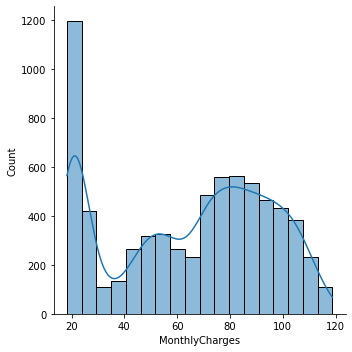

In [48]:
sb.displot(data2['MonthlyCharges'], kde=True)

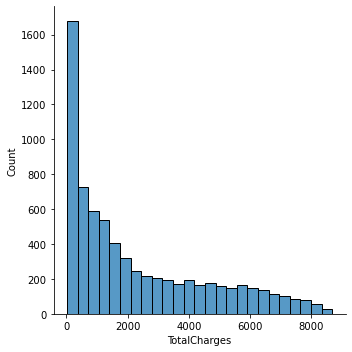

In [49]:
sb.displot(data2['TotalCharges'])

<h5> The distribution in the 'MonthlyCharges' and 'TotalCharges' vary, indicating that some customers paid more than some when subscribing. this could have led to the reason why they churned. </h5>

Creating a function to show cusomers that churned based on a feature via bar chart, where 'Stayed' means did not stop using the service and 'Churned' means they stopped.

In [50]:
def bar_chart1(feature):
    Stayed=data2[data2['Churn']=='No'][feature].value_counts()
    Churned=data2[data2['Churn']=='Yes'][feature].value_counts()
    data=pd.DataFrame([Stayed,Churned])
    data.index=['Stayed','Churned']
    data.plot(kind='bar',stacked=True,figsize=(10,5))

<H5> BASED ON THE CONTRACT </H5>

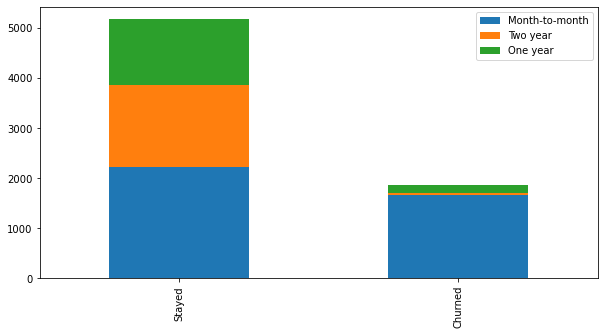

In [51]:
bar_chart1('Contract')

This bar chart shows the contracts/subscription of customers who churned or not, and from the plot above, the following were observed;

Customers who subscribed monthly (Month-to-month) were more than customers who subcribed yearly (One year and Two year)
A lot of monthly subscribers chose to continue using the company's service, also, a lot of them were not satisfied, they churned.
The bar chart also showed that customers who did yearly (one year and two year) subscription were satisfied with the company's service, and only a few percent churned. They being satisfied could be that they got value for their money.

<H5> BASED ON INTERNET SERVICE </H5>

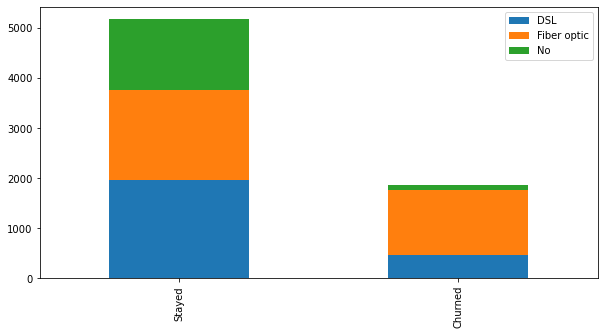

In [47]:
bar_chart1('InternetService')

From the above bar chart, it is seen that customers who uses Fiber optic are more likely to churn the the company.

## MODELLING

In [52]:
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
data2=data2.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
                  'MultipleLines', 'DeviceProtection','TechSupport','PaperlessBilling',
                  'OnlineSecurity','OnlineBackup'],axis=1)
data2

,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,DSL,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Yes,DSL,No,No,One year,Mailed check,56.95,1889.50,No
2,Yes,DSL,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,No,DSL,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,Yes,One year,Mailed check,84.80,1990.50,No
7039,Yes,Fiber optic,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,No,DSL,No,No,Month-to-month,Electronic check,29.60,346.45,No
7041,Yes,Fiber optic,No,No,Month-to-month,Mailed check,74.40,306.60,Yes


###### Label encoding the categorical values in the dataset

In [97]:
from sklearn.preprocessing import LabelEncoder as LE

In [99]:
data3=data2.copy()
data3['PhoneService']=LE().fit_transform(data3['PhoneService'])
data3['InternetService']=LE().fit_transform(data3['InternetService'])
data3['StreamingTV']=LE().fit_transform(data3['StreamingTV'])
data3['StreamingMovies']=LE().fit_transform(data3['StreamingMovies'])
data3['Contract']=LE().fit_transform(data3['Contract'])
data3['PaymentMethod']=LE().fit_transform(data3['PaymentMethod'])
data3['Churn']=LE().fit_transform(data3['Churn'])
data3

,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,2,29.85,29.85,0
1,1,0,0,0,1,3,56.95,1889.50,0
2,1,0,0,0,0,3,53.85,108.15,1
3,0,0,0,0,1,0,42.30,1840.75,0
4,1,1,0,0,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,3,84.80,1990.50,0
7039,1,1,1,1,1,1,103.20,7362.90,0
7040,0,0,0,0,0,2,29.60,346.45,0
7041,1,1,0,0,0,3,74.40,306.60,1


##### Model 1

In [100]:
y = data3['Churn']
x = data3.drop(['Churn'], axis=1) 
X = sm.add_constant(x) 
logit = sm.Logit(y,X)
eq1=logit.fit()
print(eq1.summary())

Optimization terminated successfully.
         Current function value: 0.436964
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7023
Method:                           MLE   Df Model:                            8
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                  0.2453
Time:                        11:16:07   Log-Likelihood:                -3072.7
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.8904      0.134    -14.121      0.000      -2.153      -1.628
PhoneService  

In [101]:
pred01 = eq1.predict(X)
pred01.head()

0    0.374745
1    0.094907
2    0.362311
3    0.116124
4    0.566431
dtype: float64

In [102]:
data3.describe()

,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.903299,0.872582,0.384386,0.388367,0.688567,1.573237,64.798208,2283.300441,0.265785
std,0.295571,0.737271,0.486484,0.487414,0.832934,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,118.750000,8684.800000,1.000000


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [104]:
logit1 = LogisticRegression()
logit1.fit(X, y)
pred01 = logit1.predict(X)

In [105]:
# Check the accuracy of the prediction
print(np.mean(pred01 == y))
print(logit1.score(X,y))

0.7910978384527872
0.7910978384527872


In [106]:
print(logit1.predict_proba(X)[:,0])  
print(logit1.predict(X))  

[0.65936995 0.90488593 0.63109282 ... 0.68857622 0.40531043 0.96589766]
[0 0 0 ... 0 1 0]


In [108]:
accuracy = metrics.accuracy_score(y, pred01)
precision = metrics.precision_score(y, pred01)
recall = metrics.recall_score(y, pred01)
f1 = metrics.f1_score(y, pred01)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.791, Precision: 0.635, Recall: 0.502, F1: 0.561


<h3>Confusion Matrix</h3> 

In [72]:
confus = metrics.confusion_matrix(pred01, y)
print('Confusion Matrix:\n', confus)

Confusion Matrix:
 [[4624  930]
 [ 539  939]]


<H5> The result is telling us that we have 4624+939 correct predictions and 539+930 incorrect predictions.</H5>

<h3>ROC Curve. </h3>

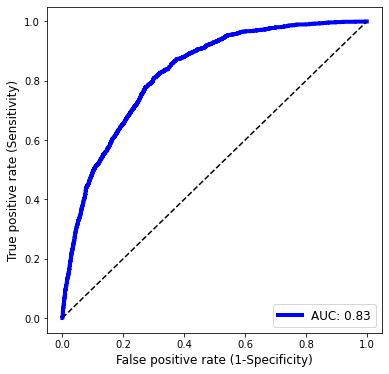

In [74]:
pred02_proba = logit1.predict_proba(X)[:,1]
fpr, tpr, _ = metrics.roc_curve(y, pred02_proba)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, linewidth=4, color='blue', label="AUC: %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 45 degree line
plt.legend(loc=4, fontsize = 12)
plt.ylabel("True positive rate (Sensitivity)", fontsize = 12)
plt.xlabel("False positive rate (1-Specificity)",fontsize = 12)
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [81]:
from sklearn.metrics import f1_score
from numpy import argmax
pred02_proba = logit1.predict_proba(X)
probs = pred02_proba[:,1]
thresholds = np.arange(0, 1, 0.001) 
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
scores = [f1_score(y, to_labels(probs, t)) for t in thresholds]
ix = argmax(scores)
print('Optimal Threshold = %.3f, F1-Score = %.4f' % (thresholds[ix], scores[ix]))

Optimal Threshold = 0.284, F1-Score = 0.6143


<h3>Use the optimal threshold to re-do prediction. Recall (Sensitivity) and F1 increase significantly.</h3>

In [78]:
pred03 = list(map(lambda x: 1 if x > 0.284 else 0, probs))
accuracy = metrics.accuracy_score(y, pred01)
precision = metrics.precision_score(y, pred01)
recall = metrics.recall_score(y, pred01)
f1 = metrics.f1_score(y, pred01)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.791, Precision: 0.635, Recall: 0.502, F1: 0.561


#### MODEL 2

In [82]:
y = data3['Churn']
x = data3[['PhoneService','InternetService','MonthlyCharges','TotalCharges']] 
X = sm.add_constant(x) 
logit2 = sm.Logit(y,X)
eq2 = logit2.fit()
print(eq2.summary())

Optimization terminated successfully.
         Current function value: 0.461077
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7027
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                  0.2037
Time:                        10:54:43   Log-Likelihood:                -3242.3
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3588      0.107    -22.087      0.000      -2.568      -2.150
PhoneService  

In [83]:
pred02 = eq2.predict(X)
pred02.head()

0    0.299273
1    0.143787
2    0.311308
3    0.200755
4    0.577051
dtype: float64

In [84]:
logit2 = LogisticRegression()
logit2.fit(X, y)
pred02 = logit2.predict(X)

In [85]:
# Check the accuracy of the prediction
print(np.mean(pred02 == y))
print(logit2.score(X,y))

0.784556313993174
0.784556313993174


In [86]:
print(logit2.predict_proba(X)[:,0])  
print(logit2.predict(X))   

[0.74282906 0.84323228 0.66823871 ... 0.78163661 0.40159694 0.90163782]
[0 0 0 ... 0 1 0]


In [87]:
accuracy = metrics.accuracy_score(y, pred02)
precision = metrics.precision_score(y, pred02)
recall = metrics.recall_score(y, pred02)
f1 = metrics.f1_score(y, pred02)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.785, Precision: 0.634, Recall: 0.447, F1: 0.524


<h3>Confusion Matrix</h3> 

In [90]:
confus = metrics.confusion_matrix(pred02, y)
print('Confusion Matrix:\n', confus)

Confusion Matrix:
 [[4682 1034]
 [ 481  835]]


<h3>ROC Curve.</h3>

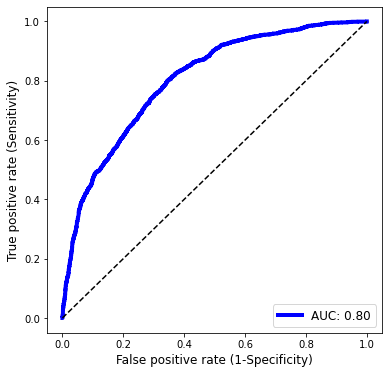

In [92]:
pred02_proba = logit2.predict_proba(X)[:,1]
fpr, tpr, _ = metrics.roc_curve(y, pred02_proba)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, linewidth=4, color='blue', label="AUC: %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 45 degree line
plt.legend(loc=4, fontsize = 12)
plt.ylabel("True positive rate (Sensitivity)", fontsize = 12)
plt.xlabel("False positive rate (1-Specificity)",fontsize = 12)
plt.show()

<h3>Optimizing Threshold</h3>  

In [93]:
from sklearn.metrics import f1_score
from numpy import argmax
pred03_proba = logit2.predict_proba(X)
probs = pred03_proba[:,1]
thresholds = np.arange(0, 1, 0.001) 
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
scores = [f1_score(y, to_labels(probs, t)) for t in thresholds]
ix = argmax(scores)
print('Optimal Threshold = %.3f, F1-Score = %.4f' % (thresholds[ix], scores[ix]))

Optimal Threshold = 0.241, F1-Score = 0.5823


<h3>Use the optimal threshold to re-do prediction. Recall (Sensitivity) and F1 increase significantly.</h3> 

In [94]:
pred03 = list(map(lambda x: 1 if x > 0.241 else 0, probs))
accuracy = metrics.accuracy_score(y, pred03)
precision = metrics.precision_score(y, pred03)
recall = metrics.recall_score(y, pred03)
f1 = metrics.f1_score(y, pred03)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.718, Precision: 0.481, Recall: 0.739, F1: 0.582
